Our data from Ito and McCauley (2020), covers 75 economies in the 1999-2020 period. Latin America is not dislosed.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

C:\Users\clint\AppData\Local\Temp\ipykernel_19904\2241295236.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


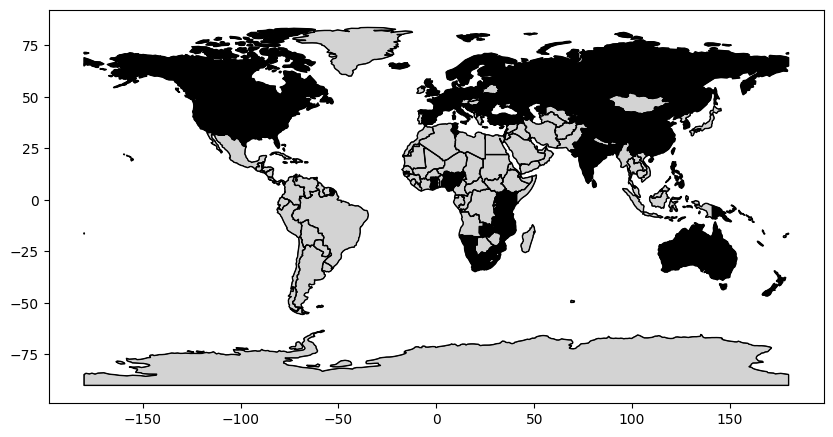

In [3]:


# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the countries based on your list
countries = [
    'United States of America', 'United Kingdom', 'Belgium', 'Denmark', 'France',
    'Germany', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden',
    'Switzerland', 'Canada', 'Euro_Area', 'Finland', 'Iceland', 'Spain', 'Turkey',
    'Australia', 'New Zealand', 'South Africa', 'Israel', 'Bangladesh', 'Brunei',
    'Sri Lanka', 'Taiwan', 'Hong Kong, China', 'India', 'South Korea', 'Philippines',
    'Ghana', 'Kenya', 'Malawi', 'Mozambique', 'Nigeria', 'Namibia', 'Tanzania',
    'Tunisia', 'Uganda', 'Zambia', 'Papua New Guinea', 'Azerbaijan', 'Georgia',
    'Kazakhstan', 'Kyrgyzstan', 'Bulgaria', 'Moldova', 'Russia', 'Tajikistan',
    'China', 'Ukraine', 'Czechia', 'Estonia', 'Latvia', 'Serbia', 'Lithuania',
    'Croatia', 'Slovenia', 'North Macedonia', 'Bosnia and Herz.', 'Poland', 'Romania'
]

# Create a column to differentiate present and not present countries
world['Presence'] = world['name'].apply(lambda x: 'Present' if x in countries else 'Not Present')

# Plot the countries
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Color the countries based on the presence column
present_countries = world[world['Presence'] == 'Present']
present_countries.plot(ax=ax, color='black')

# Display the map
plt.show()


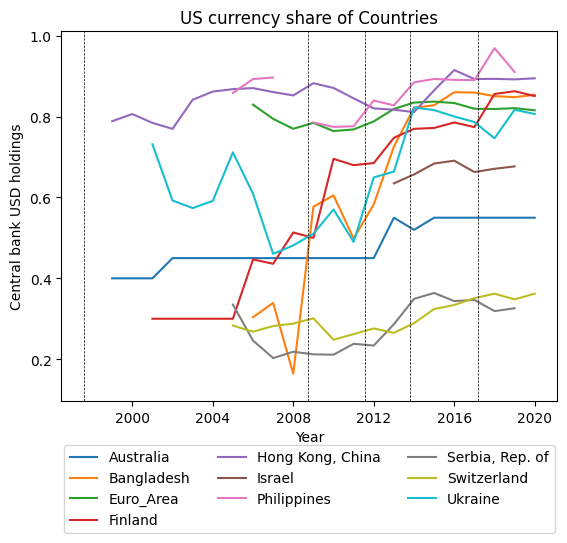

In [60]:
data = pd.read_excel('reserves_currency_share2021.xlsx')

# Specify the countries to include in the plot
countries_to_include = [ 
    'Switzerland', 'Euro_Area', 'Finland',
    'Australia','Israel', 'Bangladesh','Hong Kong, China',
     'Philippines', 'Ukraine', 'Serbia, Rep. of'
]

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
       "August 5, 1997",
    "October 3, 2008",
    "August 2, 2011",
    "October 17, 2013",
    "March 16, 2017"
]  # List of specific dates




# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()

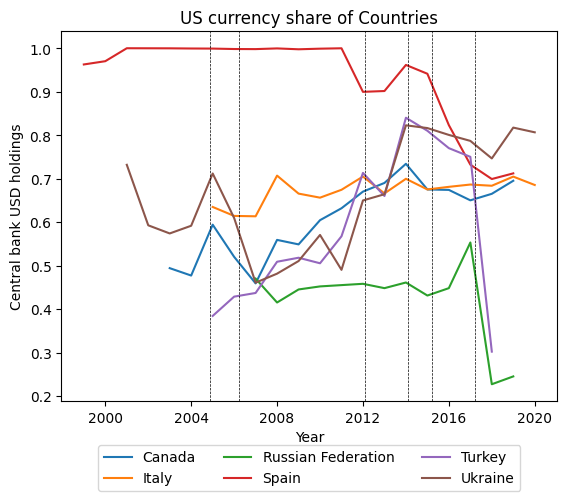

In [ ]:
data = pd.read_excel('reserves_currency_share2021.xlsx')

# Specify the countries to include in the plot
countries_to_include = [ 'Italy','Canada','Turkey',
                        'Russian Federation', 'Ukraine','Spain']

# Filter the data for the specified countries
filtered_data = data[data['Country'].isin(countries_to_include)]

# Group the filtered data by country
grouped_data = filtered_data.groupby('Country')

# Iterate over each country and plot the values against time
for country, group in grouped_data:
    group['year'] = pd.to_datetime(group['year'], format='%Y')  # Convert 'year' column to datetime
    plt.plot(group['year'], group['USD Share'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Central bank USD holdings')
plt.title('US currency share of Countries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add vertical lines at specific dates
dates = [
    "November 16, 2004",
    "March 20, 2006",
    "January 30, 2012",
    "February 7, 2014",
    "March 15, 2015",
    "March 15, 2017",
]  # List of specific dates


# Convert dates to the format "2023-01-01"
converted_dates = []
for date in dates:
    dt = datetime.strptime(date, "%B %d, %Y")
    converted_date = dt.strftime("%Y-%m-%d")
    converted_dates.append(converted_date)

specific_dates=converted_dates

for date in specific_dates:
    specific_date = pd.to_datetime(date)
    plt.axvline(x=specific_date, color='black', linestyle='--', label='Debt Ceiling Raise',linewidth=0.5)
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

#for date in specific_dates:
    #plt.axvline(x=date, color='black', linestyle='--', label='Specific Date', linewidth=0.5)  # Adjust linewidth
    #plt.text(date, plt.ylim()[1], date.strftime("%Y-%m-%d"), rotation=90, va='bottom', ha='center')

# Display the plot
plt.show()

We see a sort of identity such that in times of debt ceiling brinkmanship. US dollar share of foreign reserves drops. 

In [32]:
df = pd.read_excel('reserves_currency_share2021.xlsx')
grouped_data = df.groupby('Country')
df['USD Share Percent Change'] = grouped_data['USD Share'].pct_change()

df1 = df
df2 = pd.read_excel('debt ceiling clean.xlsx')
df1['Date'] = pd.to_datetime(df1['year'], format='%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%B %d, %Y')
df1['Year'] = df1['Date'].dt.year
df2['Year'] = df2['Date'].dt.year
merged_df = pd.merge(df1, df2, on='Year')
df=merged_df
df_sorted = df.sort_values(by=['Country', 'year'])
df_sorted = df_sorted.reset_index(drop=True)
#df_sorted.head()


#df=df_sorted

# Define the threshold value
#threshold = 5

# Filter the DataFrame based on the threshold
#filtered_df = df[df['USD Share Percent Change'] > threshold]

#filtered_df
df=df_sorted
# Assuming your DataFrame is named df

# Drop rows 91 and 92
df = df.drop([91, 92])
#df.head()


desired_columns = df.iloc[:, [1,7, 13]]
#desired_columns.head(10)


# Assuming you have a DataFrame named df with the given data
desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace('+', '')
desired_columns = desired_columns.dropna()
desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace(',', '')

df=desired_columns
df


C:\Users\clint\AppData\Local\Temp\ipykernel_19904\1300760522.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_columns['Change in Debt Ceiling (billions of dollars)'] = desired_columns['Change in Debt Ceiling (billions of dollars)'].str.replace('+', '')


,Country,USD Share Percent Change,Change in Debt Ceiling (billions of dollars)
0,Australia,0.125000,450
1,Australia,0.000000,984
2,Australia,0.000000,800
3,Australia,0.000000,781
4,Australia,0.000000,850
...,...,...,...
1293,Zambia,-0.002065,305
1295,Zambia,0.059341,213
1296,Zambia,0.001377,901
1298,Zambia,0.002181,1734


Coefficients: [[1.95094134e-05]]
Intercept: [0.0125854]


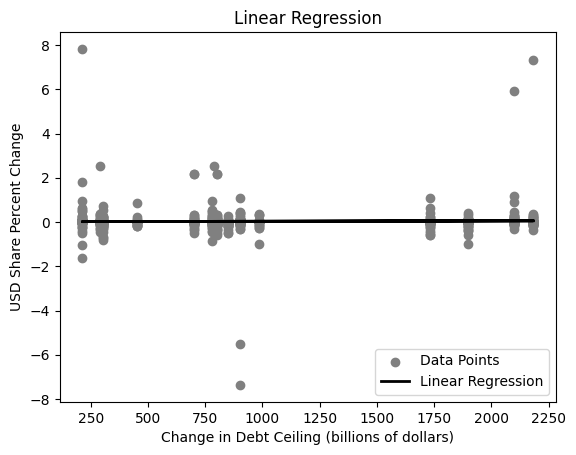

In [29]:

from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named df

# Convert the "Change in Debt Ceiling (billions of dollars)" column to numeric
df.iloc[:, 2] = pd.to_numeric(df.iloc[:, 2])

# Create the X and y variables using index locations
y = df.iloc[:, 1:2]
X = df.iloc[:, 2].values.reshape(-1, 1)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Create a scatter plot of the data points
plt.scatter(X, y, color='grey', label='Data Points')

# Add the linear regression line to the plot
plt.plot(X, model.predict(X), color='black', linewidth=2, label='Linear Regression')

# Set plot labels and title
plt.ylabel('USD Share Percent Change')
plt.xlabel('Change in Debt Ceiling (billions of dollars)')
plt.title('Linear Regression')

# Show legend
plt.legend()

# Display the plot
plt.show()


From this we see that change in debt ceiling has no correlation with central bank's preference for US dollars. 

In [36]:

average = y.mean()

# Print the average value
print("Average:", average)


Average: USD Share Percent Change    0.032972
dtype: float64


But if we average the effect, we see that on average countries  central bank use 3% more USD. 

We study weather the Debt Ceiling Brinkmanship increases welfare. Suppose 2 parties $P_l$ and $P_r$, where initally $\pi_l=\pi_r=1/2*Y$. In an ideal world with debt ceiling brinkmanship, for the ceiling to be raised, it must be the case that both parties agree to raise the ceiling such that
$$\pi_l=\pi_r=1/2*Y$$
where $Y$ is GDP.  

If $\pi_l > \pi_r$, then $P_r$ will not vote to raise the debt ceiling. We assume as an agreement comes to fruition both parties accept condition $\pi_l=\pi_r$. Though the process has a cost, the disagreement raises the cost of capital such that $$\pi_l=\pi_r=1/2*Y-C_d$$
where $C_d$ represents the increase cost of debt.


If  $P_l$ and $P_r$ can not come to an agreement then $\pi_{(t),i} = \pi_{(t-1),i}-C_b , \forall i \in \{l,r\}$, where $C_b$ represents the cost of default or "bankruptcy". We assume the initial state wherein $\pi_l=\pi_r=1/2*Y$ such that $\pi_{(t-1),i}=1/2*Y$
$$\pi_{(t),i} = \pi_{(t-1),i}=1/2*Y-C_b , \forall i \in \{l,r\}$$

We rationalize this through a game theory table.

|         | Party R: Raise | Party R: Not Raise |
|---------|---------------:|------------------:|
| Party L: Raise |    $(1/2*Y,1/2*Y)$ |  $(1/2*Y-C_d,1/2*Y-C_d)$ |
| Party L: Not Raise | $(1/2*Y-C_d,1/2*Y-C_d)$| $(1/2*Y-C_b,1/2*Y-C_b ) $ |


Intuitively, it must be that $C_b>C_d$. Prior papers have shown that the increased cost of capital from brinkmanship is temporary. But, if a default were to happen this would undoubtedly leave a permanent mark on the US's exhorbitant privilege. With this said, it must be the case that both parties will always Raise such that the equilibirum would be $1/2*Y=\pi_l=\pi_r$. Total welfare being $$W_{with}=Y=1/2*Y+1/2*Y$$

Next we consider the same scenario without debt ceiling brinkmanship. If so then, $C_d=C_b=0$, which reflects the zero risk of default. We note that $1/2*Y\neq\pi_l=\pi_r$.

If $\pi_l>\pi_r$ then $C_i>0$ exist, representing the cost of instability such that $$\pi_l=\phi*Y-C_i \\ \pi_r=\eta*Y$$

where $\phi > \eta$ and $\phi+\eta=1$. 

We then take total welfare such that $$W_{without}=Y-C_i=\phi*Y-C_i + \eta*Y$$

We conclude $$[W_{with}=Y]>[W_{without}=Y-C_i]$$ such that debt ceiling brinkmanship is welfare optimizing. 